In [3]:
!pip3 install scipy

In [30]:
#Import bibli
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth',800)
from Graphe import Graphe
import seaborn as sns


#Modification des csv
#Import csv

def transform(df):
    df.index=df["Country/Region"]
    df=df.drop(columns=["Country/Region",'Lat','Long','Province/State'])
    df=df.groupby("Country/Region").sum()
    return df


def get_confirm():
    confirm=pd.read_csv('../../dataset/global/time_series_covid19_confirmed_global.csv', sep = ',')
    confirm=transform(confirm)
    return confirm


def get_deaths():
    deaths =pd.read_csv('../../dataset/global/time_series_covid19_deaths_global.csv', sep = ',')
    deaths=transform(deaths)
    return deaths


def get_recover():
    recover=pd.read_csv('../../dataset/global/time_series_covid19_recovered_global.csv', sep = ',')
    recover=transform(recover)
    return recover

def get_total():
    total=pd.read_csv('../../dataset/global/WPP2019_TotalPopulationBySex.csv', sep = ',')
    total=total[total["Time"]==2019]
    return total

In [31]:
def conf_by_country(df,country):
    return df.loc[country]

def total_by_country(df,country):
    return int(df.loc[(df["Location"]==country)&(df["Time"]==2019),"PopTotal"].values[0] * 1000)

def total_by_sex(df, country):
    return df.loc[(df["Location"]==country)&(df["Time"]==2019), ["PopMale", "PopFemale"]]


In [108]:
df_world = get_total()
df_china = df_world.loc[(df_world["Location"]=="China")&(df_world["Time"]==2019)]
con=get_confirm()
recover=get_recover()
deaths=get_deaths()

In [110]:
df_world.describe()

,LocID,VarID,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
count,477.000000,477.0,477.0,477.0,4.430000e+02,4.430000e+02,4.770000e+02,477.000000
mean,1034.761006,2.0,2019.0,2019.5,3.491656e+05,3.421923e+05,6.420810e+05,272.551342
std,723.281616,0.0,0.0,0.0,7.179459e+05,6.977222e+05,1.375671e+06,1633.612179
min,4.000000,2.0,2019.0,2019.5,4.685100e+01,4.757400e+01,8.150000e-01,0.138000
25%,446.000000,2.0,2019.0,2019.5,4.279052e+03,4.289077e+03,4.937374e+03,30.458000
50%,903.000000,2.0,2019.0,2019.5,3.558616e+04,3.544072e+04,5.033944e+04,64.383000
75%,1586.000000,2.0,2019.0,2019.5,3.158635e+05,3.261107e+05,5.697478e+05,146.198000
max,5501.000000,2.0,2019.0,2019.5,3.889035e+06,3.824434e+06,7.713468e+06,26152.349000


In [112]:
df_china

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
47893,156,China,2,Medium,2019,2019.5,735624.259,698159.433,1433783.692,152.722


In [83]:
con.describe()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.00000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,0.090909,0.096257,0.139037,0.224599,0.299465,0.438503,0.700535,0.711230,0.914439,1.139037,1.385027,1.935829,2.278075,2.631016,3.016043,3.390374,3.844920,4.310160,4.844920,5.417112,5.951872,5.978610,7.331551,8.144385,8.909091,9.465241,9.989305,10.732620,11.347594,12.016043,12.037433,13.144385,13.203209,14.058824,14.481283,14.812834,15.048128,15.358289,15.727273,16.021390,16.497326,16.898396,17.401070,17.898396,18.497326,19.026738,20.326203,21.320856,22.796791,24.673797,25.251337,28.919786,31.176471,34.609626,38.235294,42.545455,47.181818,53.187166,61.080214,70.187166,79.278075,89.620321,101.679144,116.497326,132.556150,151.272727,170.037433,188.893048,210.903743,236.566845,265.641711,298.486631,330.545455,363.534759,390.780749,421.213904,463.433155,499.219251,539.475936,578.144385,610.406417,640.925134,671.449198,708.229947,752.181818,791.15508,838.524064,872.802139,897.181818,925.657754,963.834225,999.540107,1035.652406,1069.513369,1102.604278,1122.459893,1146.973262,1180.743316,1217.459893,1247.898396,1276.037433,1303.786096,1323.368984,1345.117647,1375.609626
std,1.243163,1.316290,1.901308,3.071344,4.095126,5.996434,9.579669,9.725923,12.504758,15.576103,18.939956,26.398643,31.078771,35.905157,41.170309,46.289209,52.505018,58.867082,66.179802,74.004412,81.317133,81.682769,100.110462,111.225797,121.609490,129.141219,136.307684,146.472366,154.735022,163.655436,163.654119,178.644555,178.788460,189.755564,194.873528,198.674809,200.796031,204.016326,207.459403,210.028492,213.124058,215.582570,218.290387,220.765665,223.104883,225.371245,228.459816,231.211312,234.695848,239.824141,241.213790,252.457063,259.447129,273.745020,289.805196,308.286858,333.680484,360.189962,399.456726,451.521362,499.841822,550.516952,611.819219,681.648542,755.333246,846.176686,938.745980,1027.296514,1128.349785,1237.420991,1358.157728,1495.437755,1634.070138,1777.229045,1898.474424,2033.125934,2220.574722,2382.272997,2563.403237,2742.044392,2902.050231,3043.428667,3191.984097,3374.292352,3586.209215,3765.31682,3976.22354

In [86]:
recover.describe()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.00000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,0.149733,0.160428,0.192513,0.208556,0.278075,0.326203,0.572193,0.673797,0.764706,1.187166,1.518717,2.524064,3.331551,4.55615,6.010695,7.951872,10.754011,13.989305,17.347594,21.101604,25.042781,27.540107,33.663102,43.090909,50.240642,58.101604,67.288770,76.748663,86.208556,97.203209,101.016043,122.385027,125.101604,134.903743,149.224599,162.481283,177.951872,196.315508,212.737968,228.427807,243.860963,257.903743,273.636364,287.679144,298.743316,312.074866,324.566845,334.192513,344.406417,358.304813,365.368984,375.673797,388.363636,406.598930,417.582888,432.299465,445.518717,454.411765,467.486631,490.331551,523.524064,525.941176,577.540107,608.486631,653.208556,700.080214,745.534759,797.229947,880.032086,952.053476,1033.032086,1124.401070,1207.465241,1316.320856,1390.438503,1478.689840,1604.566845,1757.545455,1892.914439,2011.208556,2150.320856,2255.197861,2399.224599,2534.588235,2729.967914,2896.213904,3036.133690,3164.251337,3333.192513,3450.844920,3635.796791,3796.967914,3951.860963,4222.438503,4371.197861,4523.983957,4672.069519,4849.962567,5071.791444,5421.770053,5627.887701,5845.518717,6017.304813,6217.775401,6410.866310
std,2.047563,2.193817,2.632581,2.851962,3.585769,4.243339,7.392882,8.780814,9.877107,15.651179,20.110539,33.856802,44.898418,61.64406,81.534345,108.005789,146.177251,189.832042,235.388222,286.502858,339.001948,371.609565,454.605038,583.307300,679.902358,786.443577,911.267953,1038.793016,1167.199978,1317.255101,1367.704924,1659.846787,1695.527150,1829.201416,2023.786397,2199.852452,2407.955337,2656.503236,2875.205188,3083.012430,3279.849004,3469.673613,3656.259328,3823.883215,3944.782806,4062.374480,4198.473761,4302.607918,4404.078337,4511.678359,4603.470088,4698.431154,4806.089710,4911.887346,4978.186629,5047.680325,5120.910346,5180.966160,5240.620983,5298.054691,5346.919643,5379.571790,5440.212619,5499.359213,5567.073798,5644.011384,5731.653358,5824.015504,5966.267465,6095.637609,6251.733483,6460.625664,6657.468155,6903.801390,7122.372167,7326.032681,7706.134933,8268.21

In [88]:
deaths.describe()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.00000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,0.090909,0.096257,0.139037,0.224599,0.299465,0.438503,0.700535,0.711230,0.914439,1.139037,1.385027,1.935829,2.278075,2.631016,3.016043,3.390374,3.844920,4.310160,4.844920,5.417112,5.951872,5.978610,7.331551,8.144385,8.909091,9.465241,9.989305,10.732620,11.347594,12.016043,12.037433,13.144385,13.203209,14.058824,14.481283,14.812834,15.048128,15.358289,15.727273,16.021390,16.497326,16.898396,17.401070,17.898396,18.497326,19.026738,20.326203,21.320856,22.796791,24.673797,25.251337,28.919786,31.176471,34.609626,38.235294,42.545455,47.181818,53.187166,61.080214,70.187166,79.278075,89.620321,101.679144,116.497326,132.556150,151.272727,170.037433,188.893048,210.903743,236.566845,265.641711,298.486631,330.545455,363.534759,390.780749,421.213904,463.433155,499.219251,539.475936,578.144385,610.406417,640.925134,671.449198,708.229947,752.181818,791.15508,838.524064,872.802139,897.181818,925.657754,963.834225,999.540107,1035.652406,1069.513369,1102.604278,1122.459893,1146.973262,1180.743316,1217.459893,1247.898396,1276.037433,1303.786096,1323.368984,1345.117647,1375.609626
std,1.243163,1.316290,1.901308,3.071344,4.095126,5.996434,9.579669,9.725923,12.504758,15.576103,18.939956,26.398643,31.078771,35.905157,41.170309,46.289209,52.505018,58.867082,66.179802,74.004412,81.317133,81.682769,100.110462,111.225797,121.609490,129.141219,136.307684,146.472366,154.735022,163.655436,163.654119,178.644555,178.788460,189.755564,194.873528,198.674809,200.796031,204.016326,207.459403,210.028492,213.124058,215.582570,218.290387,220.765665,223.104883,225.371245,228.459816,231.211312,234.695848,239.824141,241.213790,252.457063,259.447129,273.745020,289.805196,308.286858,333.680484,360.189962,399.456726,451.521362,499.841822,550.516952,611.819219,681.648542,755.333246,846.176686,938.745980,1027.296514,1128.349785,1237.420991,1358.157728,1495.437755,1634.070138,1777.229045,1898.474424,2033.125934,2220.574722,2382.272997,2563.403237,2742.044392,2902.050231,3043.428667,3191.984097,3374.292352,3586.209215,3765.31682,3976.22354

### Intervalle de temps :

In [101]:
#covid begining
print(f"Deaths, Debut : {deaths.columns[0]}, Fin : {deaths.columns[-1]}")
print(f"Recover, Debut : {recover.columns[0]}, Fin : {recover.columns[-1]}")
print(f"Confirme, Debut : {con.columns[0]}, Fin : {con.columns[-1]}")

Deaths, Debut : 1/22/20, Fin : 5/5/20
Recover, Debut : 1/22/20, Fin : 5/5/20
Confirme, Debut : 1/22/20, Fin : 5/5/20


### Population

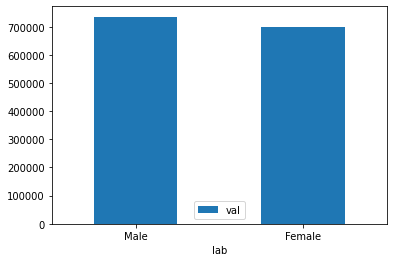

In [78]:
sex_df = total_by_sex(tot, "China")
df = pd.DataFrame({'lab':['Male', 'Female'], 'val':[sex_df["PopMale"].values[0], sex_df["PopFemale"].values[0]]})
ax = df.plot.bar(x='lab', y='val', rot=0)

In [ ]:
### 

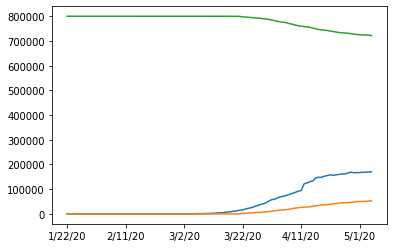

In [13]:
Graphe(confirm=con,total=tot,recover=recover,deaths=deaths,country="France")